In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('/content/drive/My Drive/BTK-Tensorflow/maliciousornot.xlsx')
print(df.shape)
df.head()

(548, 31)


,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


Type: 1 - 210, percentiles: %38.32
Type: 0 - 338, percentiles: %61.68



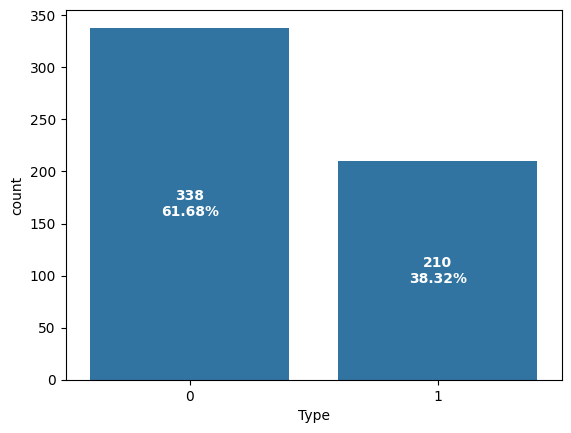

In [17]:
# Target value -> Type
# Type: 1 -> harmful (zararlı)
# Type: 0 -> harmless (zararsız)

# percentiles
type_1 = len(df[df["Type"]==1])
type_0 = len(df[df["Type"]==0])

print(f"Type: 1 - {type_1}, percentiles: %{type_1 / (type_1 + type_0) * 100:.2f}")
print(f"Type: 0 - {type_0}, percentiles: %{type_0 / (type_0 + type_1) * 100:.2f}")
print()

# distribution
ax = sns.countplot(x='Type', data=df)

for p, count in zip(ax.patches, [type_0, type_1]):
    height = p.get_height()
    percent = count / (type_0 + type_1) * 100
    ax.text(p.get_x() + p.get_width()/2, height/2, f"{count}\n{percent:.2f}%",
            ha='center', va='center', color='white', fontweight='bold')

plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

<Axes: >

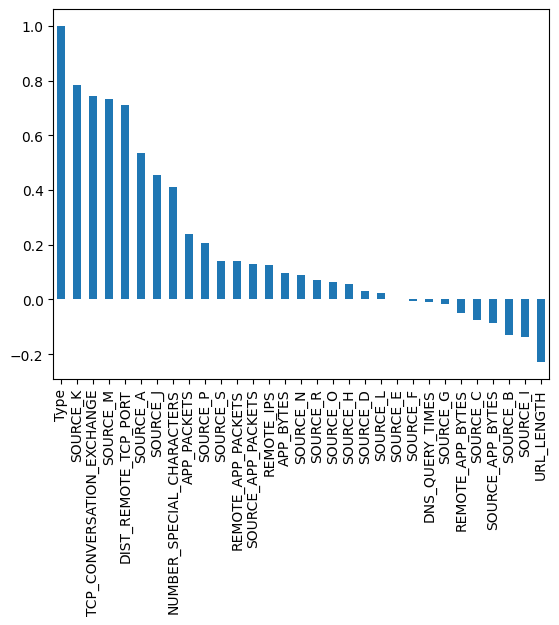

In [19]:
# correlations
df.corr()["Type"].sort_values(ascending=False).plot(kind="bar")

In [21]:
y = df["Type"].values
X = df.drop("Type", axis=1).values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
X_train.shape

(383, 30)

In [28]:
model = Sequential()

# 1st hidden layer: 30 neurons (fully connected)
model.add(Dense(units=30, activation="relu"))

# 2nd hidden layer: 15 neurons
model.add(Dense(units=15, activation="relu"))

# 3rd hidden layer: 15 neurons
model.add(Dense(units=15, activation="relu"))

# Output layer: 1 neuron (binary classification)
model.add(Dense(units=1, activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam")

In [29]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=300,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.6875 - val_loss: 0.6773
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6716 - val_loss: 0.6653
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6537 - val_loss: 0.6476
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6301 - val_loss: 0.6218
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5973 - val_loss: 0.5913
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5575 - val_loss: 0.5556
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5002 - val_loss: 0.5202
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4568 - val_loss: 0.4642
Epoch 9/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3951 - val_loss: 0.4377
Epoch 10/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3537 - val_loss: 0.3947
Epoch 11/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3113 - val_loss: 0.3698
Epoch 12/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

In [39]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,0.684054,0.677302
1,0.668729,0.665253
2,0.651384,0.647556
3,0.625468,0.621850
4,0.591225,0.591329


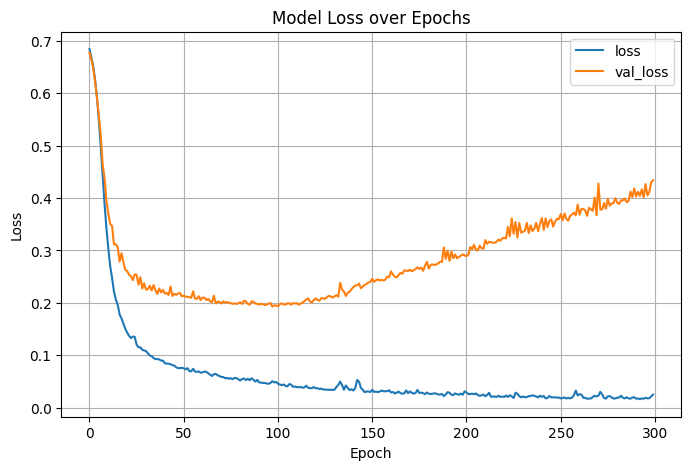

In [41]:
loss.plot(figsize=(8,5))
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

### Early Stopping

In [42]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [43]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [44]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.6874 - val_loss: 0.6671
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6653 - val_loss: 0.6528
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6432 - val_loss: 0.6321
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6160 - val_loss: 0.6042
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5793 - val_loss: 0.5704
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5329 - val_loss: 0.5247
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4942 - val_loss: 0.4806
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4295 - val_loss: 0.4410
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3718 - val_loss: 0.3961
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3236 - val_loss: 0.3778
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2937 - val_loss: 0.3456
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

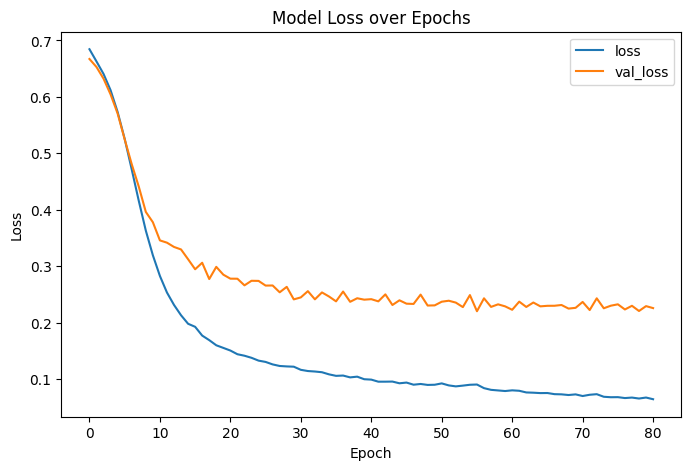

In [45]:
loss = pd.DataFrame(model.history.history)

loss.plot(figsize=(8,5))
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Dropout

In [49]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [50]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.7336 - val_loss: 0.6936
Epoch 2/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7109 - val_loss: 0.6915
Epoch 3/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6854 - val_loss: 0.6897
Epoch 4/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6964 - val_loss: 0.6882
Epoch 5/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6700 - val_loss: 0.6871
Epoch 6/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6729 - val_loss: 0.6858
Epoch 7/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6934 - val_loss: 0.6851
Epoch 8/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6508 - val_loss: 0.6842
Epoch 9/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6768 - val_loss: 0.6835
Epoch 10/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6554 - val_loss: 0.6827
Epoch 11/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6680 - val_loss: 0.6816
Epoch 12/600
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

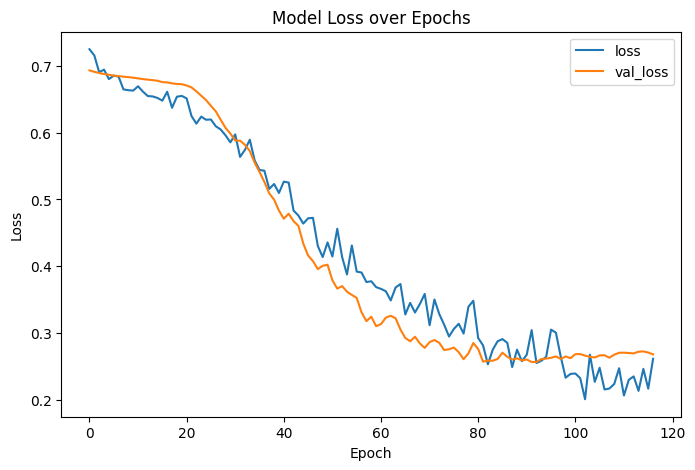

In [51]:
loss = pd.DataFrame(model.history.history)

loss.plot(figsize=(8,5))
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Predict probabilities
y_pred_prob = model.predict(X_test)

# 2) Convert to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# 3) Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Accuracy: 0.9030303030303031

Confusion Matrix:
 [[85  6]
 [10 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        91
           1       0.91      0.86      0.89        74

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165

